In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx
np.set_printoptions(precision=3, suppress=True)

In [2]:
# Sygnał
taos = 0.002 * np.arange(501)
sigma = 0.05
omegas = 5 * np.arange(31)
t = np.linspace(0, 1, 100)
theta = 30 * np.sin(5 * t)
a = 1 + 0.5 * np.sin(11 * t)
y = a * np.sin(theta)

In [11]:
# Elementy bazowe
basis = []
params = []
for tao in taos:
    for omega in omegas:
        f1 = np.exp(-np.power((t-tao) / sigma, 2)) * np.cos(omega * t)
        f2 = np.exp(-np.power((t-tao) / sigma, 2)) * np.sin(omega * t)
        params.append([tao, omega])
        params.append([tao, omega + np.pi/2])
        basis.append(f1)
        basis.append(f2)

basis = np.array(basis)

In [39]:
# Zadanie najmniejszych kwadratów
x = cvx.Variable((len(basis), 1))
# x = np.ones((len(basis), 1))
basis_linear_combination = cvx.multiply(basis, x)

In [40]:
y_approx = cvx.sum(basis_linear_combination, axis=0)

In [43]:
diff = cvx.Minimize(cvx.norm(y_approx - y, 2) + 0.1 * cvx.norm(x, 1))
problem = cvx.Problem(diff, [])
problem.solve(solver="ECOS")


1.3270191934775244

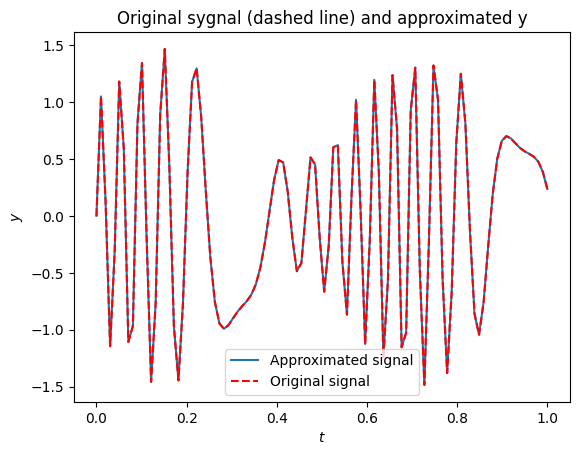

In [57]:
# Aproksymacja sygnału
plt.plot(t, y_approx.value, label='Approximated signal')
plt.plot(t, y, 'r--', label='Original signal')
plt.legend()
plt.xlabel("$t$")
plt.ylabel("$y$")
plt.title("Original sygnal (dashed line) and approximated y")
plt.show()

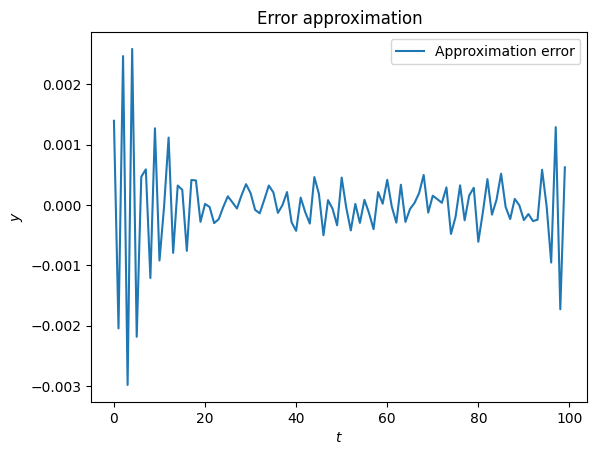

In [64]:
# Błąd aproksymacji
plt.plot(y_approx.value - y, label='Approximation error')
plt.xlabel("$t$")
plt.ylabel("$y$")
plt.legend()
plt.title('Error approximation')
plt.show()

In [60]:
# Wektory niezerowe
nonzero_components = np.where(np.abs(x.value) > 0.1)[0]

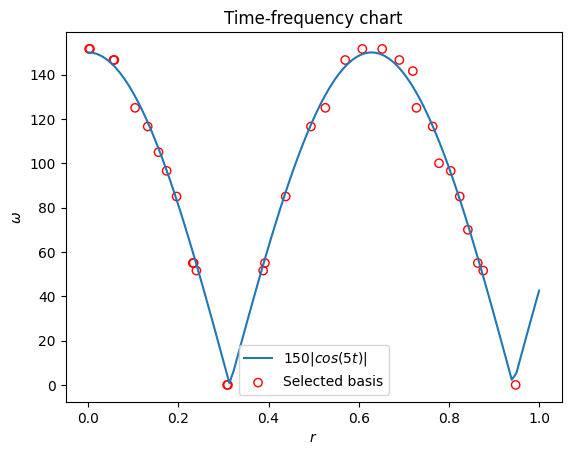

In [69]:
# Wykres czasowo-czestotliwościowy
plt.plot(t, 150 * np.abs(np.cos(5 * t)), label='$150\|cos(5t)|$')
plt.scatter(np.array(params)[nonzero_components, 0], np.array(params)[nonzero_components, 1], marker='o', facecolors='none', edgecolor='r', label='Selected basis')
plt.title('Time-frequency chart')
plt.xlabel("$r$")
plt.ylabel("$\omega$")
plt.legend()
plt.show()